In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank-additional-full_final (1).csv", sep=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Above is the details of the customers of bank with name xyz
2. The xyz bank have launched a new service in the bank(eg: edu.loan, business loan, home loan, etc)
3. Aim: Build a classification model that can predict whether the custoer will choose a service or not

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#to check whether the data is binary classified or not
df['y'].value_counts()

no     36556
yes     4640
Name: y, dtype: int64

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [7]:
# Data cleaning

df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [8]:
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41195,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41196,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41197,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
df.isnull().sum().sum()

76

In [10]:
df.dropna(inplace = True)

In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [12]:
df.duplicated().sum()

13

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41185    False
41186    False
41187    False
41193    False
41194     True
Length: 41190, dtype: bool

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [16]:
df.shape

(41177, 21)

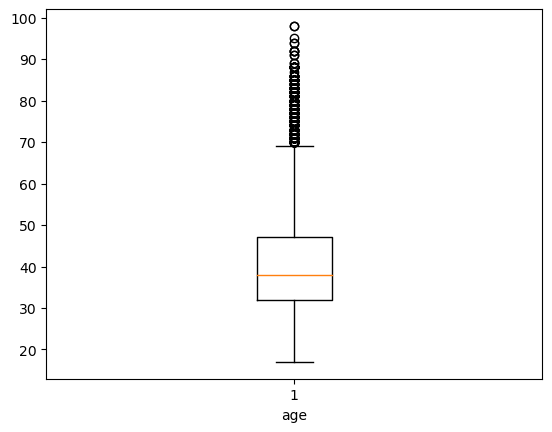

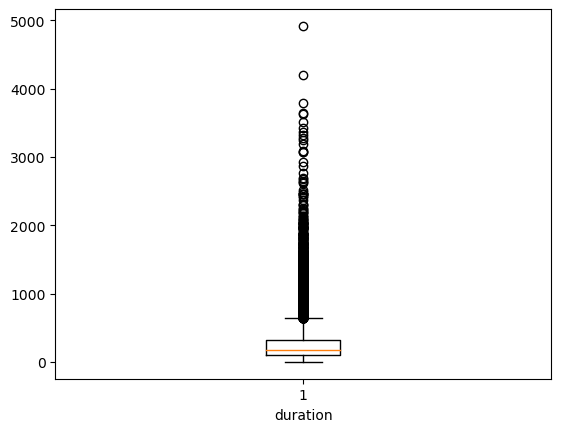

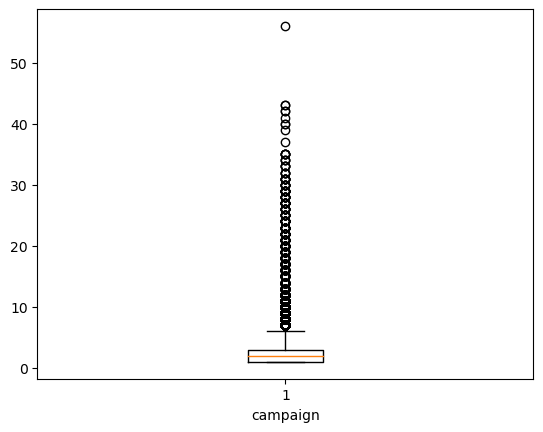

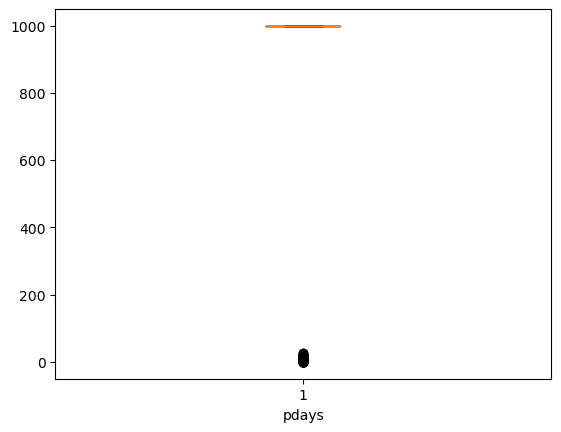

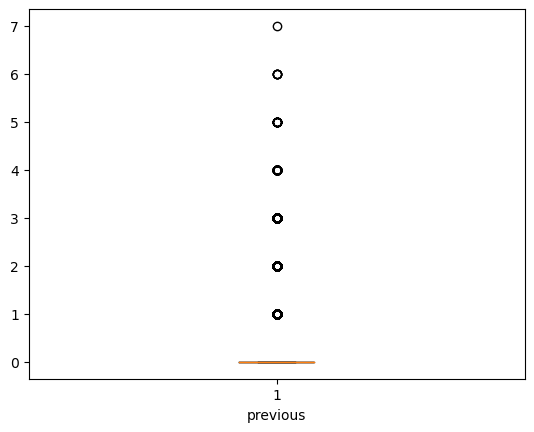

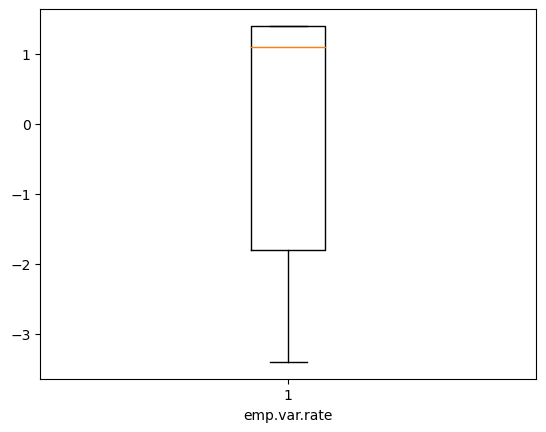

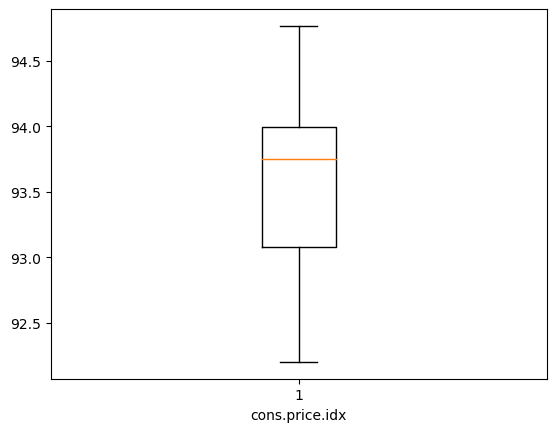

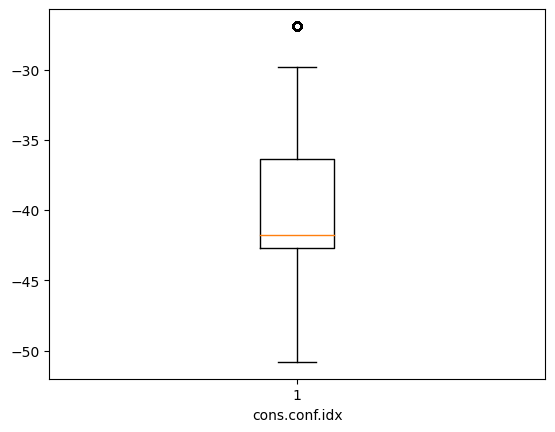

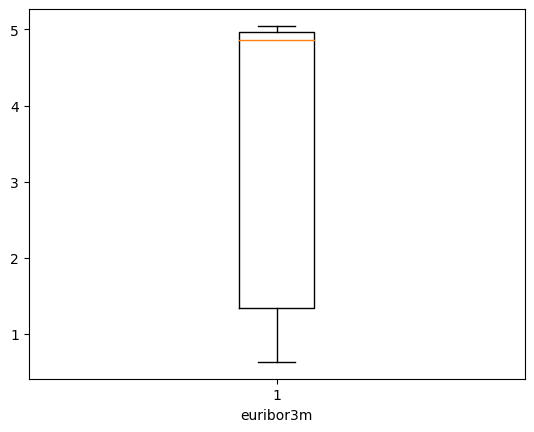

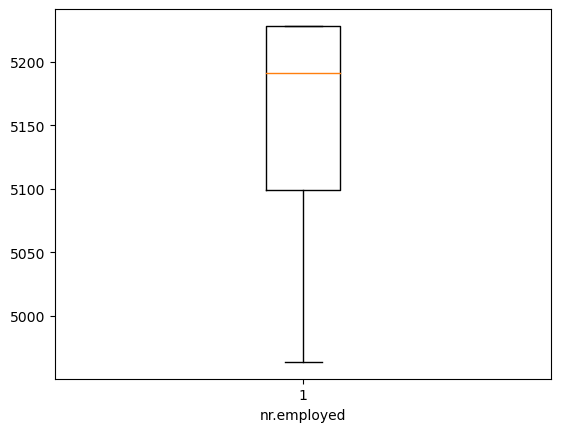

In [17]:
#Dealing with outliers
for col in df.columns:
    if df[col].dtype!='object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [18]:
out_list=['age','duration','campaign','cons.conf.idx']

In [19]:
#Removing Outliers
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR= Q3-Q1
LW = Q1-1.5*IQR
UW= Q3+1.5*IQR

print(Q1, Q3, IQR)

32.0 47.0 15.0


In [20]:
print(LW,UW)

9.5 69.5


In [21]:
df[(df['age']<=UW) & (df['age']>=LW)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [22]:
for col in out_list:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR= Q3-Q1
    LW = Q1-1.5*IQR
    UW= Q3+1.5*IQR
    df = df[(df[col]<=UW) & (df[col]>=LW)]


In [23]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [24]:
#Here 999 has occured a lot of times wrt to others hence it is not an outlier, its just system thought it is because of extreme value and this is why we dont use this as an outlier
#Same for previous column too
df['pdays'].value_counts()

999.0    33959
3.0        362
6.0        308
4.0         97
9.0         54
12.0        50
7.0         45
2.0         45
10.0        44
5.0         36
13.0        28
1.0         23
11.0        22
15.0        20
14.0        15
0.0         13
8.0         10
16.0        10
17.0         8
18.0         6
22.0         3
21.0         2
25.0         1
26.0         1
27.0         1
20.0         1
19.0         1
Name: pdays, dtype: int64

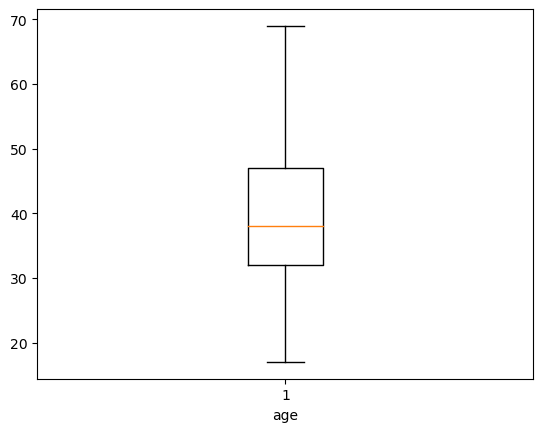

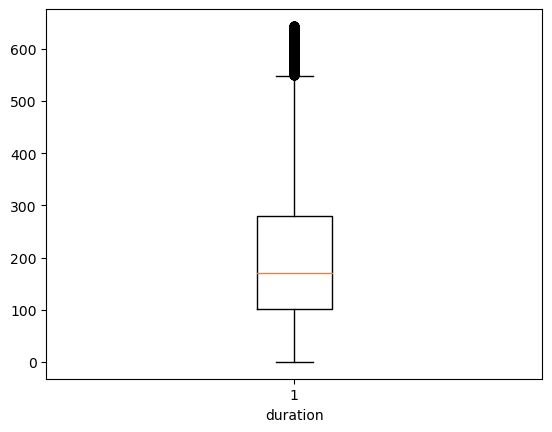

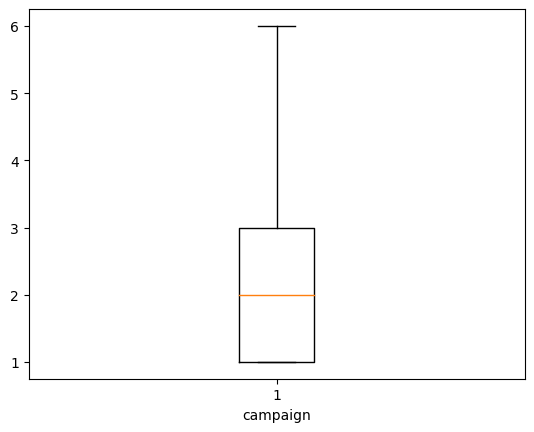

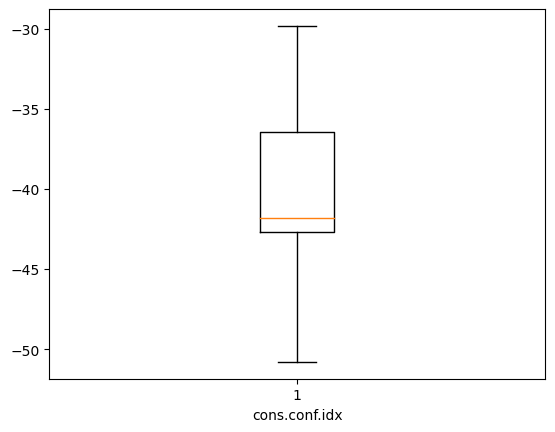

In [25]:
for col in out_list:
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [26]:
#Do visualization

In [27]:
df["y"]=df["y"].map({"yes":1,"no":0})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


# Feature Selection

In [28]:
#Removing columns which are not correlated 
#VIF(Variance inflation faction)
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.002694,0.012643,0.004257,-0.023142,0.076681,0.041054,0.102274,0.088340,0.074006,-0.018263
duration,0.002694,1.000000,-0.057019,-0.073896,0.045881,-0.051410,0.001239,-0.002723,-0.059857,-0.078508,0.268706
campaign,0.012643,-0.057019,1.000000,0.042143,-0.057057,0.089231,0.067005,-0.005738,0.074475,0.084622,-0.054545
pdays,0.004257,-0.073896,0.042143,1.000000,-0.574387,0.261084,0.064616,-0.072250,0.288853,0.368947,-0.379844
previous,-0.023142,0.045881,-0.057057,-0.574387,1.000000,-0.420205,-0.200631,-0.088675,-0.453358,-0.502100,0.264984
emp.var.rate,0.076681,-0.051410,0.089231,0.261084,-0.420205,1.000000,0.767724,0.309361,0.972554,0.901892,-0.335969
cons.price.idx,0.041054,0.001239,0.067005,0.064616,-0.200631,0.767724,1.000000,0.149011,0.681468,0.503772,-0.141888
cons.conf.idx,0.102274,-0.002723,-0.005738,-0.072250,-0.088675,0.309361,0.149011,1.000000,0.373525,0.200479,0.041083
euribor3m,0.088340,-0.059857,0.074475,0.288853,-0.453358,0.972554,0.681468,0.373525,1.000000,0.943603,-0.345636
nr.employed,0.074006,-0.078508,0.084622,0.368947,-0.502100,0.901892,0.503772,0.200479,0.943603,1.000000,-0.404713


In [29]:
columns=[]
for col in df.columns:
    if df[col].dtype!='object':
        columns.append(col)

In [30]:
columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [31]:
df[columns].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.002694,0.012643,0.004257,-0.023142,0.076681,0.041054,0.102274,0.088340,0.074006,-0.018263
duration,0.002694,1.000000,-0.057019,-0.073896,0.045881,-0.051410,0.001239,-0.002723,-0.059857,-0.078508,0.268706
campaign,0.012643,-0.057019,1.000000,0.042143,-0.057057,0.089231,0.067005,-0.005738,0.074475,0.084622,-0.054545
pdays,0.004257,-0.073896,0.042143,1.000000,-0.574387,0.261084,0.064616,-0.072250,0.288853,0.368947,-0.379844
previous,-0.023142,0.045881,-0.057057,-0.574387,1.000000,-0.420205,-0.200631,-0.088675,-0.453358,-0.502100,0.264984
emp.var.rate,0.076681,-0.051410,0.089231,0.261084,-0.420205,1.000000,0.767724,0.309361,0.972554,0.901892,-0.335969
cons.price.idx,0.041054,0.001239,0.067005,0.064616,-0.200631,0.767724,1.000000,0.149011,0.681468,0.503772,-0.141888
cons.conf.idx,0.102274,-0.002723,-0.005738,-0.072250,-0.088675,0.309361,0.149011,1.000000,0.373525,0.200479,0.041083
euribor3m,0.088340,-0.059857,0.074475,0.288853,-0.453358,0.972554,0.681468,0.373525,1.000000,0.943603,-0.345636
nr.employed,0.074006,-0.078508,0.084622,0.368947,-0.502100,0.901892,0.503772,0.200479,0.943603,1.000000,-0.404713


<Axes: >

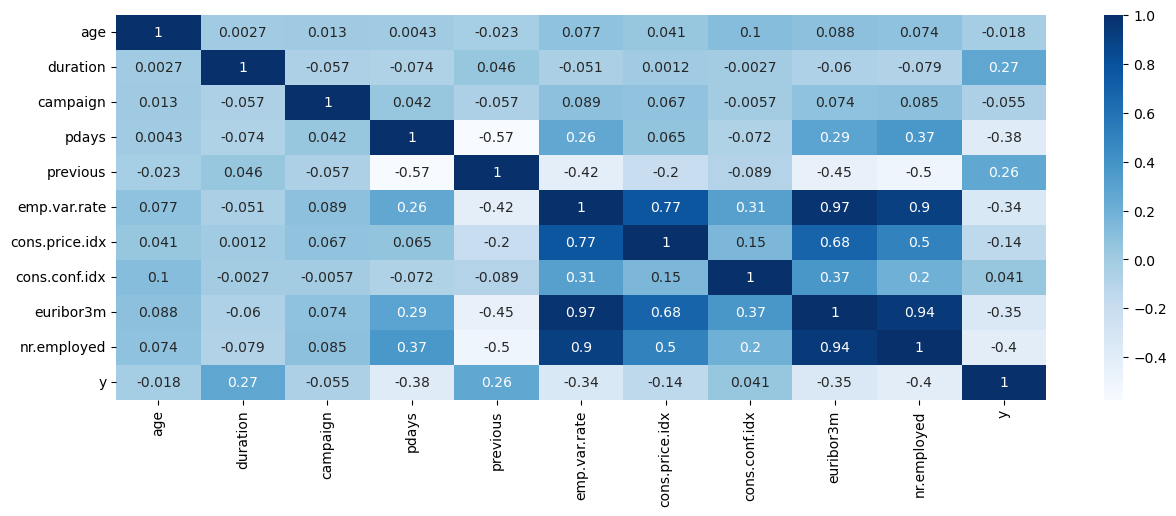

In [32]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

<Axes: >

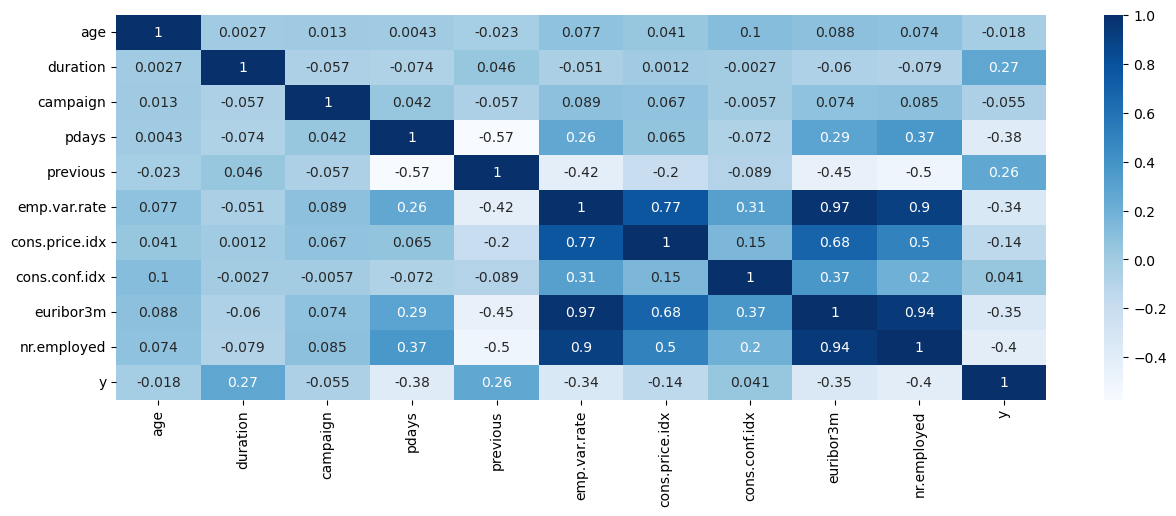

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(df[columns].corr(), cmap='Blues', annot=True)

In [34]:
#VIF- Variance inflation factor is what we will use as y doesnt show any relationship or high corelation with any of the columns
#multicolinearity: If 2 or more independent features show dependency and has high correlation but has less with the target or it can be high is basically multicolinearity
#In other words interdependencies among the independent features
#We need to remove multicolinearity in our data
#We first aplly label encoding before going to VIF


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
df['job']=le.fit_transform(df['job'])

In [38]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [39]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [40]:
df['poutcome']

0        nonexistent
1        nonexistent
2        nonexistent
3        nonexistent
4        nonexistent
            ...     
41181    nonexistent
41182        success
41184    nonexistent
41185    nonexistent
41186    nonexistent
Name: poutcome, Length: 35165, dtype: object

In [41]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col]=le.fit_transform(df[col])
       

In [42]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35165 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35165 non-null  float64
 1   job             35165 non-null  int32  
 2   marital         35165 non-null  int32  
 3   education       35165 non-null  int32  
 4   default         35165 non-null  int32  
 5   housing         35165 non-null  int32  
 6   loan            35165 non-null  int32  
 7   contact         35165 non-null  int32  
 8   month           35165 non-null  int32  
 9   day_of_week     35165 non-null  int32  
 10  duration        35165 non-null  float64
 11  campaign        35165 non-null  float64
 12  pdays           35165 non-null  float64
 13  previous        35165 non-null  float64
 14  poutcome        35165 non-null  int32  
 15  emp.var.rate    35165 non-null  float64
 16  cons.price.idx  35165 non-null  float64
 17  cons.conf.idx   35165 non-null 

In [65]:
#follow below code for doing vif before label encoding
cols=[]
for col in df.columns:
    if((df[col].dtype!='object') & (col!='y')):
        cols.append(col)

In [66]:
cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [67]:
x=df[cols]

In [68]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,281.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,29.0,10,2,0,0,2,0,0,7,0,112.0,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6


In [69]:
vif_data = pd.DataFrame()
vif_data['features']=x.columns

In [70]:
vif_data

,features
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [71]:
vif_data['VIF_values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [72]:
vif_data

,features,VIF_values
0,age,22.113993
1,job,2.100861
2,marital,5.690071
3,education,4.560285
4,default,1.411946
5,housing,2.212409
6,loan,1.208306
7,contact,2.942422
8,month,6.685085
9,day_of_week,3.099808


In [73]:
#axis=1 will remove the column and if not mentioned, removes row
x.drop(['nr.employed'], axis=1, inplace=True)

C:\Users\Jasmine Ansari\AppData\Local\Temp\ipykernel_18976\25302978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['nr.employed'], axis=1, inplace=True)


In [74]:
vif_data = pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF_values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF_values
0,age,22.107715
1,job,2.100612
2,marital,5.689362
3,education,4.558657
4,default,1.409350
5,housing,2.212084
6,loan,1.208260
7,contact,2.446094
8,month,5.784547
9,day_of_week,3.098930


In [75]:
x.drop(['cons.price.idx'], axis=1, inplace=True)

C:\Users\Jasmine Ansari\AppData\Local\Temp\ipykernel_18976\91750180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['cons.price.idx'], axis=1, inplace=True)


In [76]:
vif_data = pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF_values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF_values
0,age,20.980560
1,job,2.095040
2,marital,5.544426
3,education,4.503309
4,default,1.409322
5,housing,2.210417
6,loan,1.207694
7,contact,2.348235
8,month,5.726141
9,day_of_week,3.084650


In [77]:
x.drop(['pdays'], axis=1, inplace=True)

C:\Users\Jasmine Ansari\AppData\Local\Temp\ipykernel_18976\3840995888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['pdays'], axis=1, inplace=True)


In [78]:
vif_data = pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF_values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF_values
0,age,20.156176
1,job,2.091851
2,marital,5.426164
3,education,4.449798
4,default,1.409226
5,housing,2.206690
6,loan,1.207556
7,contact,2.274814
8,month,5.664673
9,day_of_week,3.072542


In [79]:
x.drop(['euribor3m'], axis=1, inplace=True)

C:\Users\Jasmine Ansari\AppData\Local\Temp\ipykernel_18976\1065815061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['euribor3m'], axis=1, inplace=True)


In [80]:
vif_data = pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF_values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF_values
0,age,17.204219
1,job,2.085747
2,marital,5.226350
3,education,4.292137
4,default,1.408832
5,housing,2.198757
6,loan,1.207316
7,contact,2.266725
8,month,5.270616
9,day_of_week,3.032416


In [81]:
x.drop(['cons.conf.idx'], axis=1, inplace=True)

C:\Users\Jasmine Ansari\AppData\Local\Temp\ipykernel_18976\3588095460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['cons.conf.idx'], axis=1, inplace=True)


In [82]:
vif_data = pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF_values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF_values
0,age,11.058997
1,job,2.076503
2,marital,4.372058
3,education,4.193335
4,default,1.407850
5,housing,2.162435
6,loan,1.204070
7,contact,2.242675
8,month,4.871672
9,day_of_week,2.969072


In [83]:
x.drop(['age'], axis=1, inplace=True)

C:\Users\Jasmine Ansari\AppData\Local\Temp\ipykernel_18976\2080616313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['age'], axis=1, inplace=True)


In [84]:
vif_data = pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF_values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF_values
0,job,2.053348
1,marital,4.351772
2,education,4.013198
3,default,1.323133
4,housing,2.112544
5,loan,1.200876
6,contact,2.241469
7,month,4.605944
8,day_of_week,2.888478
9,duration,2.988925


In [85]:
x.drop(['poutcome'], axis=1, inplace=True)

C:\Users\Jasmine Ansari\AppData\Local\Temp\ipykernel_18976\2378826952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['poutcome'], axis=1, inplace=True)


In [86]:
vif_data = pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF_values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF_values
0,job,2.034164
1,marital,4.135585
2,education,3.788774
3,default,1.313522
4,housing,2.080645
5,loan,1.198855
6,contact,2.225619
7,month,4.490123
8,day_of_week,2.803667
9,duration,2.834777


In [87]:
#We keep deleting the features until we get the vif_values <=5
#If we get dont get vif values below 5 and only 3-4 features are left, we cant then consider vif values >=(6-7)
#Max 7, not more than that

In [88]:
x

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1
41182,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1


In [89]:
y=df['y'] #Dependent column

In [90]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41181    1
41182    0
41184    0
41185    0
41186    1
Name: y, Length: 35165, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lo_model = LogisticRegression()

In [94]:
lo_model

LogisticRegression()

In [95]:
lo_model.fit(x_train,y_train)

C:\Users\Jasmine Ansari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
lo_pred = lo_model.predict(x_test)

In [97]:
lo_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
y_test

34348    0
28335    0
19370    0
16719    0
631      0
        ..
12810    0
31321    0
11540    0
1046     0
28225    0
Name: y, Length: 10550, dtype: int64

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [100]:
accuracy_score(lo_pred, y_test)

0.9241706161137441

In [101]:
confusion_matrix(y_test, lo_pred)

array([[9571,  187],
       [ 613,  179]], dtype=int64)

In [102]:
9571+179

9750

In [103]:
9750/10550

0.9241706161137441